# Nonlinear Equations

<div class="alert alert-block alert-info">
    <img style="float: right;" src="https://raw.githubusercontent.com/OpenSourceEconomics/ose-corporate-design/master/logos/OSE_logo_RGB.svg" width="150">
    <u><h1>Setup</h1></u>
</div>

One of the most basic numerical problems encountered in computational economics is to find the solution of a system of nonlinear equations. Nonlinear equations generally arise in one of two forms. In the nonlinear **rootfinding problem**, a function f from R n to R n is given, and one must compute an n-vector x, called a root of f , that satisfies $f(x) = 0$. In the nonlinear **fixed-point problem**, a function $g$ from $R^n$ to $R^n$ is given, and one must compute an n-vector $x$, called a fixed-point of $g$, that satisfies
$x = g(x)$.

The two forms are equivalent. The rootfinding problem may be recast as a fixed-point problem by letting g(x) = x − f (x); conversely, the fixed-point problem may be recast as a rootfinding problem by letting f (x) = x − g(x).

In [1]:
from functools import partial

import pandas as pd
import numpy as np


from nonlinear_algorithms import bisect
from nonlinear_plots import plot_bisect_example

from nonlinear_algorithms import fixpoint
from nonlinear_plots import plot_fixpoint_example

from nonlinear_algorithms import newton_method
from nonlinear_problems import get_cournot_problem

from nonlinear_algorithms import mcp_minmax, mcp_fischer
from nonlinear_problems import get_mcp_problem
from nonlinear_problems import get_spacial_market
from nonlinear_problems import get_fischer_problem

from scipy import optimize

<div class="alert alert-block alert-info">
    <u><h2>Bisection method</h2></u>
</div>

We start with the bisection method.

In [19]:
??bisect

Signature: bisect(f, a, b, tolerance=1.5e-08)
Source:   
def bisect(f, a, b, tolerance=1.5e-8):
    """Apply bisect method to root finding problem.

    Iterative procedure to find the root of a continuous real-values function :math:`f(x)` defined
    on a bounded interval of the real line. Define interval :math:`[a, b]` that is known to contain
    or bracket the root of :math:`f` (i.e. the signs of :math:`f(a)` and :math:`f(b)` must differ).
    The given interval :math:`[a, b]` is then repeatedly bisected into subintervals of equal length.
    Each iteration, one of the two subintervals has endpoints of different signs (thus containing
    the root of :math:`f`) and is again bisected until the size of the subinterval containing the
    root reaches a specified convergence tolerance.

    Parameters
    ----------
    f : callable
        Continuous, real-valued, univariate function :math:`f(x)`.
    a : int or float
        Lower bound :math:`a` for :math:`x \\in [a,b]`.
    b : int

In [23]:
def f(x):
    return x ** 3 - 2


a, b = 1, 2
bisect(f, a, b)

1.259921059012413

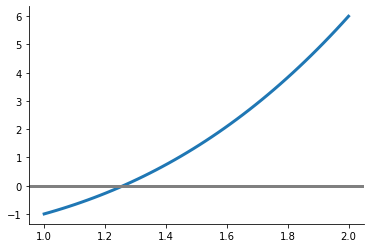

In [24]:
plot_bisect_example(f, a, b)

<div class="alert alert-block alert-info">
    <u><h2>Function iteration</h2></u>
</div>


In [29]:
??fixpoint

Signature: fixpoint(f, x0, tolerance=0.0001)
Source:   
def fixpoint(f, x0, tolerance=10e-5):
    """Compute fixed point using function iteration.

    Parameters
    ----------
    f : callable
        Function :math:`f(x)`.
    x0 : float
        Initial guess for fixed point (starting value for function iteration).
    tolerance : float
        Convergence tolerance (tolerance < 1).

    Returns
    -------
    x : float
        Solution of function iteration.

    Examples
    --------
    >>> import numpy as np
    >>> x = fixpoint(f=lambda x : x**0.5, x0=0.4, tolerance=1e-10)
    >>> np.allclose(x, 1)
    True

    """
    e = 1
    while e > tolerance:
        # Fixed point equation.
        x = f(x0)
        # Error at the current step.
        e = np.linalg.norm(x0 - x)
        x0 = x
    return x
File:      ~/external-storage/ownCloud/office/OpenSourceEconomics/teaching/scientific-computing/course/lectures/nonlinear_equations/nonlinear_algorithms.py
Type:      function


In [31]:
def f(x):
    return np.sqrt(x)


x0 = 0.1
fixpoint(f, x0)

0.999929733148366

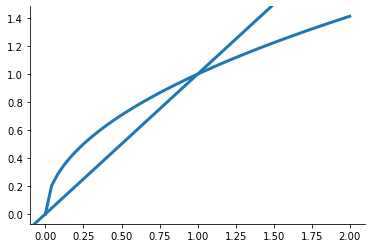

In [26]:
plot_fixpoint_example(f)

<div class="alert alert-block alert-info">
    <u><h2>Newton's method</h2></u>
</div>


In [32]:
??newton_method

Signature: newton_method(f, x0, tolerance=1.5e-08)
Source:   
def newton_method(f, x0, tolerance=1.5e-8):
    """Apply Newton's method to solving nonlinear equation.

    Solve equation using successive linearization, which replaces the nonlinear problem
    by a sequence of linear problems whose solutions converge to the solution of the nonlinear
    problem.

    Parameters
    ----------
    f : callable
        (Univariate) function :math:`f(x)`.
    x0 : float
        Initial guess for the root of :math:`f`.
    tolerance : float
        Convergence tolerance.

    Returns
    -------
    xn : float
        Solution of function iteration.

    """
    x0 = np.atleast_2d(x0)

    # https://github.com/randall-romero/CompEcon/blob/master/textbook/chapter03.py
    xn = x0.copy()

    while True:
        fxn, gxn = f(xn)
        if np.linalg.norm(fxn) < tolerance:
            return xn[0]
        else:
            xn = xn - np.linalg.solve(gxn, fxn)
File:      ~/external-storage/ownClo

In [34]:
def f(x):
    fval = x ** 3 - 2
    fjac = 3 * x ** 2
    return fval, fjac


x0 = 1.0
newton_method(f, x0)

array([1.2599])

In [35]:
c, e = np.array([0.6, 0.8]), 1.6
cournot_p = partial(get_cournot_problem, c, e)

x0 = [0.2, 0.2]
newton_method(cournot_p, x0)

array([0.8396, 0.6888])

<div class="alert alert-block alert-info">
    <u><h2>Quasi-Newton method</h2></u>
</div>


In [38]:
c, e = np.array([0.6, 0.8]), 1.6
cournot_p = partial(get_cournot_problem, c, e, jac=False)

x0 = [0.8, 0.2]
optimize.root(cournot_p, x0, method="broyden1")

     fun: array([4.8663e-07, 7.6301e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 6
  status: 1
 success: True
       x: array([0.8396, 0.6888])

In [40]:
cournot_p = partial(get_cournot_problem, c, e)

x0 = [0.2, 0.2]
newton_method(cournot_p, x0)

array([0.8396, 0.6888])

## Convergence rates

<div class="alert alert-block alert-info">
    <u><h2>Choosing a solution method</h2></u>
</div>

We now consider a more challenging task and compare the performance of `scipy`'s root finding algorithms.

In [10]:
def exponential_function(x):

    p = x.shape[0]
    rslt = np.tile(np.nan, p)

    for i in range(p):
        if i == 0:
            rslt[i] = np.exp(x[i]) - 1
        else:
            rslt[i] = (i / 10) * (np.exp(x[i]) + x[i - 1] - 1)

    return rslt


METHODS = ["broyden1", "broyden2", "anderson", "Krylov"]

OPTIONS = dict()
OPTIONS["maxiter"] = 500

DIMENSION = 10

In [11]:
df = pd.DataFrame(columns=["Algorithm", "Sample", "Success", "Iteration"])

In [12]:
counter = 0
options = dict()
for method in METHODS:

    summary = dict()
    summary["success"] = 0
    for _ in range(10):

        counter += 1
        x0 = np.random.uniform(size=DIMENSION)

        try:
            rslt = optimize.root(exponential_function, x0, method=method, options=options,)
        except OverflowError:
            rslt = dict()
            rslt["success"] = False
            rslt["nit"] = OPTIONS["maxiter"]

        summary["success"] += rslt["success"]

        df.loc[counter] = [method, _, rslt["success"], rslt["nit"]]

/home/peisenha/local/anaconda3/envs/ose-course-scientific-computing/lib/python3.8/site-packages/scipy/optimize/nonlin.py:1001: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)
<ipython-input-10-09378506524e>:10: RuntimeWarning: overflow encountered in exp
  rslt[i] = (i / 10) * (np.exp(x[i]) + x[i - 1] - 1)


<div class="alert alert-block alert-info">
    <u><h2>Complementarity problems</h2></u>
</div>

In [13]:
x0 = np.array([0.5, 0.5])
a, b = np.array([[0.0, 0.0], [1.0, 1.0]])
mcp_minmax(get_mcp_problem, x0, a, b)

     fun: array([-9.4764e-08, -1.0832e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 11
  status: 1
 success: True
       x: array([0.7937, 1.    ])

## Here I get different values for x than in the presentations, but the implied quantities and prices are the same.

In [14]:
a = np.zeros(9)
b = np.full(9, np.inf)
x0 = np.zeros(9)
x_sol = mcp_minmax(get_spacial_market, x0, a, b)
quantities = x_sol["x"].reshape(3, 3).round(4)

In [15]:
if True:
    A = np.array
    as_ = A([9, 3, 18])
    bs = A([1, 2, 1])
    ad = A([42, 54, 51])
    bd = A([2, 3, 1])
    c = A([[0, 3, 9], [3, 0, 3], [6, 3, 0.0]])

prices = as_ + bs * quantities.sum(0)
prices

array([24.0001, 27.    , 30.    ])

In [16]:
exports = quantities.sum(0) - quantities.sum(1)

In [17]:
a = np.zeros(1)
# need to make robust
b = np.full(1, np.inf)
x0 = np.zeros(1)

x_sol = mcp_minmax(get_fischer_problem, x0, a, b)
print("Minmax", x_sol)

x_sol = mcp_fischer(get_fischer_problem, x0, a, b)
print("Fischer", x_sol)

Minmax      fun: array([0.0171])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 500
  status: 2
 success: False
       x: array([0.0036])
Fischer      fun: array([-7.7421e-11])
 message: 'A solution was found at the specified tolerance.'
     nit: 333
  status: 1
 success: True
       x: array([2.005])
